# Poravnava 3D in 2D slik

## Klinični kontekst

Poravnava *preoperativno* zajetih 3D medicinskih slik na *medoperativno* zajete 2D slike omogoča medoperativno določanje položaja anatomije v 3D prostoru pacienta in prenos ter fuzijo operativnih načrtov. Ta tehnologija je zelo uporabna pri posegu za stabilizacijo hrbtenice, pri kateri kirurg v posamezno vretence vstavi pedikularni vijak in nato vijake poveže s kovinsko palico tako da izravna oz. stabilizira hrbtenico ([slika 1ab](#slika1)). Pred posegom kirurg na osnovi 3D slike računalniške tomografije (CT; ang. *Computed Tomography*) preuči stanje hrbtenice in določi trajektorijo vstavljanja pedikularnih vijakov ([slika1c](#slika1)), s pomočjo medoperativne žive rentgenske slike pa ta načrt prenese v prostor bolnika. 

Pri vaji boste načrtali in ovrednotili postopek za poravnavo 3D CT in 2D rentgenskih slik vretenc in preko poravnave slik prenesli predoperativni načrt vstavljanja pedikularnega vijaka iz 3D CT slike na 2D rentgensko sliko.

<a id='slika1'></a>
### Slika 1: vstavljanje pedikularnega vijaka za stabilizacijo skoliotične hrbtenice

<table style="width:100%" bgcolor="#FFFFFF" align="center">
  <tr>
    <th>    
    <img src="images/ams_vaja1_skolioza.jpg" alt="Primer skoliotične hrbtenice" style="float;left;width: 300px;"/>
    </th>
    <th>
    <img src="images/ams_vaja1_stabilizacija.jpg" alt="Stabilizacija hrbtenice" style="float;left;width: 200px;"/>
    </th>
    <th>
    <img src="images/ams_vaja1_vijak1.jpg" alt="Načrt vstavljanja vijaka" style="float;left;width: 300px;"/>
    </th> 
  </tr>
  <tr>
      <td style="text-align:center">(a)</td>
      <td style="text-align:center">(b)</td>
      <td style="text-align:center">(c)</td>
  </tr>
</table>

(a) Pacient z degenerativno skoliozo in (b) stabilizacija hrbtenice s pedikularnimi vijaki. (c) 3D model vretenca izluščen iz predoperativne CT slike in načrtovana trajektorija vstavljanja pedikularnega vijaka.

## Navodila
Postopek prileganja 3D modela na 2D sliko imenujemo **3D-2D poravnava**. 3D-2D poravnava je proces iskanja optimalne geometrijske preslikave $\mathcal{T}: \mathbb{R}^3 \rightarrow \mathbb{R}^3$, ki 3D model oz. sliko $V$ nekega objekta preslika v tako lego, ki je *skladna* s projekcijo istega objekta na zajeti 2D sliki $P$. Glavni izziv pri poravnavi 3D in 2D slik je prostorska neskladnost slikovne informacije (3D vs. 2D), ki jo lahko odpravimo na dva načina: 
1. **s projekcijo 3D informacije v 2D slikovni prostor** ali 
2. z rekonstrukcijo 3D slike iz različnih 2D projekcij.

Pri vaji boste načrtali postopek poravnave s **projekcijo 3D slike v 2D** ($\mathcal{P}: \mathbb{R}^3 \rightarrow \mathbb{R}^2$) in maksimizacijo mere podobnosti $MP$ med projekcijo $\mathcal{P}(V)$ in 2D sliko $P$. 

Način projekcije zavisi od oblike 3D informacije. Pri vaji bo dana 3D CT slika, v kateri vsak slikovni element predstavlja atenuacijski koeficient $\mu(\mathbf{x})$ zajete 3D scene. Za potrebe poravnave 3D in 2D slik boste s pomočjo 3D CT slike simulirali 2D rentgenske slike, pri katerih se projekcija iz 3D prostora v 2D sliko izraža kot integral atenuacijskega koeficienta vzdolž premice od izvora rentgenskih žarkov $S$ do 2D slikovne ravnine $P = \int_l \mu(l) dl$. Tovrstno projekcijo 3D CT slike imenujemo digitalno rekonstruirani rentgenski posnetek (DRR; ang. *Digitally Reconstructed Radiograph*). Primer pojekcije in pripadajoče količine so prikazane na [sliki 2](#slika2).

<a id='slika2'></a>
### Slika 2: Ustvarjanje projekcije 3D slike in diagram poteka 3D-2D poravnave

<img src="images/RV_8_SLO_3D2DPoravnava.png" alt="Potek 3D-2D poravnave slik" style="float;left;width: 800px;"/>

Prostorsko ujemanje med projekcijo $\mathcal{P}(V)$ in 2D sliko $P$ ovrednotimo z mero podobnosti $MP$; to je skalarna funkcija, ki zavzame maksimum, ko se položaji korespondenčnih struktur v $\mathcal{P}(V)$ in $P$ medsebojno prekrivajo. Mero podobnosti je potrebno smiselno izbrati, tako da je čim manj občutljiva na motilna slikovna neskladja in čim bolj občutljiva na dejanska geometrijska neskladja med slikama. 

Za poravnavo monomodalnih slik, pri katerih običajno velja predpostavka o linearni zvezi med intenzitetami slik v poravnavi, se pogosto uporablja **korelacijski koeficient** $CC$ (CC &ndash; ang. Correlaction Coefficient), ki je definiran kot:

$$
    CC(I, J) = \frac{\sum_{i=1}^{N}\sum_{j=1}^{M} (I(x_i, y_j) - \overline{I}) \cdot (J(x_i, y_j) - \overline{J})}{\sqrt{\sum_{i=1}^{N}\sum_{j=1}^{M} (I(x_i, y_j) - \overline{I})^2 \sum_{i=1}^{N}\sum_{j=1}^{M} (J(x_i, y_j) - \overline{J})^2}}\, \hspace{5mm} \in {[-1, 1]},
$$

kjer $N$ in $M$ predstavljata število elementov vzdolž $x$ in $y$ osi slike. 

Za poravnavo večmodalnih slik, tj. slik ki so zajete z različnimi napravami in v katerih so zveze med intenzitetami slik v poravnavi lahko le statistične, se pogosto uporabljata **medsebojna informacija** $MI$ (MI &ndash; ang. Mutual Information):

$$
    MI(I,J) = H(I) + H(J) - H(I,J) \,,
$$

kjer sta $H(I)$ in $H(J)$ entropija referenčne $I(x,y)$ in lebdeče $J(x,y)$ slike, $H(I,J)$ pa njuna skupna entropija: 

$$
  \begin{split}
    H(I) &= - \sum_{s_I=0}^{L-1} p_I(s_I) \log p_I(s_I)\,,\\
    H(J) &= - \sum_{s_J=0}^{L-1} p_J(s_J) \log p_J(s_J)\,,\\
    H(I,J) &= - \sum_{s_I=0}^{L-1}\sum_{s_J=0}^{L-1} p_{IJ}(s_I,s_J) \log p_{IJ}(s_I,s_J)\,,\\
  \end{split}
$$

kjer spremenljivki $s_I$ in $s_J$ označujeta soležne, diskretne sivinske vrednosti referenčne slike $I(x,y)$ in lebdeče slike $J(x,y)$, $L$ pa število diskretnih vrednosti. Verjetnostni porazdelitvi $p_I(s_I)$ in $p_J(s_J)$ ter skupno porazdelitev $p_{IJ}(s_I,s_J)$ dobimo iz pripadajočih normaliziranih histogramov $h_I(s_I)$, $h_J(s_J)$ ter $h_{IJ}(s_I,s_J)$:

$$
  p_I(s_I) = \frac{h_I(s_I)}{N\cdot M}\,,\quad
  p_J(s_J) = \frac{h_J(s_J)}{N\cdot M}\,,\quad
  p_{IJ}(s_I,s_J) = \frac{h_{IJ}(s_I,s_J)}{N\cdot M}\,,
$$

kjer $N$ in $M$ predstavljata število elementov vzdolž $x$ in $y$ osi slike.

Tekom poravnave 3D in 2D slike nam izbrana optimizacijska metoda iterativno spreminja parametre $\mathbf{p}$ geometrijske preslikave $\mathcal{T} = \mathcal{T}(\mathbf{p})$ tako, da maksimizira mero podobnosti: 

$$
  \mathbf{p}^* = \mathrm{argmax}_\mathbf{p} \, MP\Bigl( \mathcal{P}\bigl( V[ \mathcal{T}(\mathbf{p}) ]\bigr), P \Bigr) \,,
$$

kjer so $\mathbf{p}^*$ optimalni parametri preslikave $\mathcal{T}(\mathbf{p})$. Za poravnavo 3D in 2D slik vretenc boste uporabili togo preslikavo, ki je v 3D definirana s šestimi parametri $\mathbf{p}=[t_x, t_y, t_z, \alpha, \beta, \gamma]^{\mathrm{T}}$. Postopek poravnave 3D in 2D slik je prikazan na [sliki 2](#slika2).

### Gradivo 
Za vajo potrebujete datoteki `ct.nrrd` in `xray.nrrd`, ki podajata 3D CT sliko ledvenega vretenca L3 in 2D rentgensko sliko ledvenih vretenc L1-L5. 3D CT slika ima dimenzije $97 \times 95 \times 39$ in je zapisana z nepredznačenimi 8-bitnimi celimi števili, 2D rentgenska slika pa ima dimenzije $446 \times 446$ in je zapisana z nepredznačenimi 16-bitnimi celimi števili. Geometrijski preslikavi CT in rentgenske slike iz prvega slikovnega elementa z indeksom `[0, 0, 0]` oz. `[0, 0]` v referenčni koordinatni sistem sta dani s homogenima matrikama $T_{ct}$ oz. $T_{xray}$ v naslednjih Python spremenljivkah:

In [1]:
# Pozicija xray in ct v prostoru. Ponavadi že podano nerabiš računat
# Matriki za poravnavo iz globalnega v lokalni koordinatni sistem
# Gre za afino preslikavo
ctTPos = [
    [1, 0, 0, 19.961],
    [0, 1, 0, 23.7891],
    [0, 0, 1, 164],
    [0, 0, 0, 1]
]

xrayTPos = [
    [-0.2925, -0.0510, -0.9549, 397.8680],
    [-0.9542, 0.0809, 0.2879, 192.7720],
    [0.0625, 0.9954, -0.0723, -107.8180],
    [0, 0, 0, 1]
]

Položaj izvora rentgenskih žarkov v referenčnem koordinatnem sistemu je v točki:

In [2]:
xraySPos = [-648.471, 285.483, 117.612]

Korak vzorčenja 3D in 2D slik je 1 milimeter, kar lahko ugotovite tudi z branjem metapodatkov (funkcija `GetSpacing()`) v vhodnih `.nrrd` slikah. Geometrijske razmere in količine so ponazorjene v [sliki 2](#slika2). 

## Naloge
Predno pričnete z reševanjem nalog izvedite spodnji blok kode, ki naloži potrebne Python knjižnice in definira nekaj pomožnih funkcij.

In [3]:

import matplotlib.pyplot as plt
import numpy as np
import time
import amslib
import SimpleITK as sitk

from scipy.optimize import fmin, minimize
from scipy.interpolate import interpn
import scipy.ndimage as ni
from mpl_toolkits.mplot3d import Axes3D

def preprocess_ct(ct):
    ct_temp = dict(ct)
    ct_temp['img'] = (ct_temp['img'] - np.median(ct_temp['img'])).\
           astype('float')
    return ct_temp        

def preprocess_Xray(Xray):
    Xray_temp = dict(Xray)
    Xray_temp['img'] = amslib.windowImage(Xray_temp['img'], 60.0, 120.0)
    Xray_temp['img'] = Xray_temp['img'].astype('float') / \
             Xray_temp['img'].max() * 255.0
    return Xray_temp

# Dodaš homogenor matriko, zato da lahko množiš z 4x4 matriko
def addHomogCoord(iPts):
    '''
    Seznamu 2D koordinat dodaj homogeno koordinato

    Parameters
    ----------
    iPts : numpy.ndarray
        Polje Nx3 koordinat x, y, z
        
    Returns
    --------
    oPts : numpy.ndarray
        Polje Nx4 homogenih koordinat x, y, z

    '''
    iPts = np.asarray(iPts)
    iPts = np.hstack((iPts, np.ones((iPts.shape[0],1))))
    return iPts

1. Naložite 3D CT in 2D Xray sliki. Za vsako od slik ustvarite spremenljivko tipa `dict`, npr. `ct` in `Xray`, in pod ključem `'img'` vnesite sivinske vrednosti slike in pod ključem `'TPos'` pripadajočo preslikavo v referenčnem koordinatnem sistemu (`ctTPos` in `xrayTPos`), za 2D rentgensko sliko vnesite pod ključem `'SPos'` še položaj izvora rentgenskih žarkov (`xraySPos`).

In [4]:
# naloži slike s SimpleITK knjižnico
### BEGIN SOLUTION
ct_img = sitk.GetArrayFromImage(sitk.ReadImage('data/ct.nrrd'))
xray_img = sitk.GetArrayFromImage(sitk.ReadImage('data/xray.nrrd'))
### END SOLUTION
# oblikuj v spremenljivki tipa dict (slovar) z ustreznimi ključi
### BEGIN SOLUTION
Xray = {
    'img':xray_img,            # X-ray slika
    'TPos':np.array(xrayTPos), # matiriko preslikave x-ray
    'SPos':np.array(xraySPos)  # izvor rentgenskih žarkov
}
ct = {
    'img':ct_img,            # CT slika
    'TPos':np.array(ctTPos)  # pozicija CT slike
}
### END SOLUTION

2. Ustvarite vzorčni mreži 2D rentgenske in 3D CT slike s pomočjo ukaza `numpy.meshgrid()`. Točke na vzorčnih mrežah preslikajte v referenčni koordinatni sistem s pripadajočimi 3D togimi preslikavami `Xray.TPos` in `ct.TPos`. Preslikane točke 3D in 2D vzorčnih mrež in položaj izvora rentgenskih žarkov `Xray.SPos` prikažite s pomočjo ukaza `Axes3D.scatter()`. Preverite pravilnost dobljene geometrijske postavitve izvora $S$, 3D in 2D slike v referenčnem koordinatnem sistemu s [slike 3](#slika3).

<a id='slika3'></a>
### Slika 3: Geometrijska postavitev izvora in vzorčnih točk 3D in 2D slike v referenčnem koordinatnem sistemu
<img src="images/RV_8_SLO_3DGeometrija.png" alt="Geometrijska postavitev" style="float;left;width: 800px;"/>

In [10]:
# ustvari polje vzorčnih koordinat
s3z, s3y, s3x = ct['img'].shape
g3x, g3y, g3z = np.meshgrid(range(s3x), range(s3y), range(s3z), indexing='xy')
# ustvari Nx4 matriko, zadnja koordinata homogena. Homogeno rabimo za afino
# Dodaj homogeno koordinato
g3 = np.vstack((g3x.flatten(), g3y.flatten(), g3z.flatten())).transpose()
g3 = np.hstack((g3, np.ones((g3.shape[0], 1))))
# ustvari polje vzorčnih koordinat
s2y, s2x = Xray['img'].shape
g2x, g2y = np.meshgrid(range(s2x), range(s2y), indexing='xy')
# ustvari Mx4 matriko, zadnja koordinata homogena
g2 = np.vstack((g2x.flatten(), g2y.flatten())).transpose()
g2 = np.hstack((g2, np.zeros((g2.shape[0], 1)), np.ones((g2.shape[0], 1))))

"""
x  y  z  1
0  0  0  1
1  0  0  1
2  0  0  1
0  1  0  1
1  1  0  1
2  1  0  1
"""
# preslikaj v svetovni koordinatni sistem
# Uporabiš transpose, da matriko ustrezno pomnožiš in preneseš v svetovni koordinatni sistem
g3p = np.dot(g3, ct['TPos'].transpose()) # g3 je velikosti Nx4, ct['TPos'] je velikosti 4x4. Če bi bila velikosti 4xN, bi množili iz leve
g2p = np.dot(g2, Xray['TPos'].transpose())
xsp = Xray['SPos'].flatten()
# izriši decimirane točke v svetovnem koordinatnem sistemu
s2, s3 = 50, 30

# Uporabi samo če inštaliraš pyqt6 ali 5 z pip install PyQt5 ali pip install PyQt6
%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xsp[0], xsp[1], xsp[2], c='m', marker='o')
ax.scatter(g2p[::s2,0], g2p[::s2,1], g2p[::s2,2], c='b', marker='.', linewidths=0)
ax.scatter(g3p[::s3,0], g3p[::s3,1], g3p[::s3,2], c='g', marker='.', linewidths=0)
plt.show()

3. Napišite funkcijo, ki preslika poljubno točko `iPos` v 3D prostoru na 2D slikovno ravnino glede na izvor rentgenskih žarkov $S$ (`xraySPos`):
```python
    def mapPointToPlane( iPos, Xray ):
        return oPos
```
kjer je `iPos` matrika $N \times 3$, `Xray` pa spremenljivka s podatki o 2D rentgenski sliki. Funkcija vrne točke v matriki `oPos` v obliki matrike $N \times 3$. V ravnino preslikane točke izračunate kot presečišča 2D slikovne ravnine s premicami, ki izvirajo v izvoru rentgenskih žarkov in gredo skozi točke `iPos`. Preverite delovanje funkcije tako, da preslikate koordinate oglišč 3D slike na 2D slikovno ravnino in točke vrišete v geometrijsko postavitev iz prejšnje naloge.

In [5]:
# iščemo presečišče med premico in ravnino. 
def mapPointToPlane(iPos, Xray):
    ### BEGIN SOLUTION
    # tocke so v obliki Nx3/4
    iPos = np.asarray(iPos)
    if iPos.ndim == 1:   # za eno samo točko da je res array ( če je sam ena točka, potem želimo zapisat to kot vrstico)
        iPos = np.reshape(iPos, (1, iPos.size))    
    iPos = iPos[:,:3]    # če imamo slučajno homogeno komponento že
    # doloci izhodisce na detektorju
    p0 = np.dot(Xray['TPos'], np.array([0, 0, 0, 1])) # tako ga prestavimo v globalni prostor (v 2D slikovni ravnini gre za točko 0,0,0,1)
    # doloci normalo na ravnino (rabiš normalo da dobis enačbo ravnine)
    ex = np.dot(Xray['TPos'], np.array([1, 0, 0, 1])) # enotna točka na ravnini x-raya, ki ga preslikamo v globalni prostor
    ey = np.dot(Xray['TPos'], np.array([0, 1, 0, 1])) # enotna točka na ravnini x-raya, ki ga preslikamo v globalni prostor
    n = np.cross(ex[:-1] - p0[:-1], ey[:-1] - p0[:-1])    # normala je vektorski produkt med vektorjema ex in ey
    n = n / np.sqrt(np.sum(n**2.0))  # naredimo da je enotska
    # skrajsaj vse vektorje na dimenzije 1x3
    p0, n = p0[:3], n[:3]
    SPos = Xray['SPos'].reshape((1,3))    
    # koeficient za skaliranje smernega vektorja
    # premica: T + C*s Točka na premici + konstanta * smerni vektor
    #od izvora mimo iPos na detektor
    alpha = np.dot(p0 - SPos, n) / np.dot(iPos - SPos, n)
    # glej papirus

    # doloci polozaj tock na detektorju
    # oPos = SPos + alpha * (iPos - SPos) --> glej gor enačbo
    oPos = SPos + alpha.reshape((iPos.shape[0],1)) * (iPos - SPos)
    ### END SOLUTION
    return oPos

S spodnjo kodo **testirajte pravilnost delovanja** funkcije `mapPointToPlane()`:

In [30]:
# ustvari mrezo tock oglisc 3D slike
sz, sy, sx = ct['img'].shape
g3x, g3y, g3z = np.meshgrid((0, sx-1), (0, sy-1), (0, sz-1), indexing='xy')
g3 = np.vstack((g3x.flatten(), g3y.flatten(), g3z.flatten())).transpose()
g3 = np.hstack((g3, np.ones((g3.shape[0], 1))))
g3p = np.dot(g3, ct['TPos'].transpose())
# ustvari mrezo tock oglisc 2D slike
s2y,s2x = Xray['img'].shape
g2x,g2y = np.meshgrid((0, s2x-1),(0, s2y-1),indexing='xy')
# ustvari Mx4 matriko, zadnja koordinata homogena
g2 = np.vstack((g2x.flatten(), g2y.flatten())).transpose()
g2 = np.hstack((g2, np.zeros((g2.shape[0], 1)), np.ones((g2.shape[0], 1))))
g2p = np.dot(g2, Xray['TPos'].transpose())
# koordinata izvora zarkov
xsp = Xray['SPos'].flatten()    
# tocke 3D oglisc na ravnini detektorja
g2proj = mapPointToPlane(g3p[:, :3], Xray)
# narisi geometrijske razmere
s = 1
fig = plt.figure()    
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xsp[0], xsp[1], xsp[2], c='m', marker='o')
ax.scatter(g2p[::s, 0], g2p[::s, 1], g2p[::s, 2], c='b', marker='.', linewidths=0)
ax.scatter(g3p[::s, 0], g3p[::s, 1], g3p[::s, 2], c='g', marker='.', linewidths=0)
ax.scatter(g2proj[:, 0], g2proj[:, 1], g2proj[:, 2], c='r', marker='o')
# od zgoraj:
# ax.view_init(elev=80, azim=-125)
# iz zornega kota vira
# ax.view_init(elev=-9, azim=147)

4. Napišite funkcijo za stožčasto projekcijo 3D CT slike v 2D slikovno ravnino, ki simulira delovanje rentgena (DRR):
```python
    def project3DTo2D( ct, Xray, iStep ):
        return oDRR, oMask
```
kjer sta `ct` in `Xray` spremenljivki s podatki o 3D CT in 2D rentgenski sliki, `iStep` pa je korak vzorčenja v **milimetrih** vzdolž vsake premice od izvora rentgenskih žarkov do presečišča z 2D slikovno ravnino. Funkcija vrne 2D DRR sliko v spremenljivki `oDRR` in 2D masko DRR slike v spremenljivki `oMask`, ki imata dimenzije $446\times446$ (enako kot `xrayImg`). 2D maska DRR slike označuje tiste točke 2D slikovne ravnine, za katere premica do izvora rentgenskih žarkov seče 3D CT sliko. Preizkusite delovanje funkcije s pomočjo danih `ct` in `Xray` slik in ustvarite DRR oz. projekcijo 3D CT slike. Preizkusite vpliv dolžine koraka `iStep` na projecirano sliko.

In [10]:
def project3DTo2D_slow(ct, Xray, iStep):
    '''
    Naloga 4: Funkcija za stozcasto projekcijo 3D slike v 2D ravnino

    Parameters
    ----------
    ct : dict
        Podatki o 3D ct sliki in sivinske vrednosti pod ključi TPos in img
    Xray : dict
        Podatki o 2D Xray sliki in sivinske vrednosti pod ključi TPos, SPos in img
    iStep : float
        Korak vzorčenja v mm vzdolž Xray žarkov od izvora do 2D detektorja
    
    Returns
    ---------
    oDRR : numpy.ndarray
        Izhodna iz 3D v 2D prostor preslikana slika, ki simulira rentgen
    oMask : numpy.ndarray
        Maska področja kamor se preslika 3D slika (1-ospredje, 0-ozadje)
    '''
    # ustvari mrezo tock oglisc 3D slike
    s3z, s3y, s3x = ct['img'].shape
    g3x, g3y, g3z = np.meshgrid((0,s3x-1),(0,s3y-1),(0,s3z-1),indexing='xy')
    g3 = np.vstack((g3x.flatten(),g3y.flatten(),g3z.flatten())).transpose()
    g3 = np.hstack((g3, np.ones((g3.shape[0],1))))
    g3p = np.dot(g3, ct['TPos'].transpose())    
    
    # tocke 3D oglisc na ravnini detektorja
    g2proj = mapPointToPlane(g3p[:,:3], Xray)       
    # preslikaj v 2D ravnino (ravnina detektorja)
    g2plane = np.dot(addHomogCoord(g2proj), \
                np.linalg.inv(Xray['TPos']).transpose()) 
    
    # poisci najmanjsi ocrtan pravokotnik
    xmin = np.floor(np.min(g2plane[:,0]))
    xmax = np.ceil(np.max(g2plane[:,0]))
    ymin = np.floor(np.min(g2plane[:,1]))
    ymax = np.ceil(np.max(g2plane[:,1]))
    
    # preveri ali so tocke znotraj 2D slike -- maska
    s2y, s2x = Xray['img'].shape
    xmin = np.max((0,xmin)); xmin = int(np.min((s2x,xmin)))
    xmax = np.max((0,xmax)); xmax = int(np.min((s2x,xmax)))
    ymin = np.max((0,ymin)); ymin = int(np.min((s2y,ymin)))
    ymax = np.max((0,ymax)); ymax = int(np.min((s2y,ymax)))
    
    # definiraj mrezo tock v 2D ravnini
    g2x, g2y = np.meshgrid(range(xmin,xmax), range(ymin,ymax), indexing='xy')
    rectShape = g2x.shape
    
    # ustvari Mx4 matriko, zadnja koordinata homogena
    g2 = np.vstack((g2x.flatten(),g2y.flatten())).transpose()
    g2 = np.hstack((g2, np.zeros((g2.shape[0],1)), np.ones((g2.shape[0],1))))
    g2 = np.dot(g2, Xray['TPos'].transpose())
    
    # preberi pozicijo izvora zarkov
    xsp = Xray['SPos'].flatten().reshape((1,3))
    
    # doloci minimalno in maksimalno razdaljo za vzorcenje med izvorom in 3d sliko
    d = np.sqrt(np.sum((g3p[:,:3]  - xsp)**2.0, axis=1))
    dmin = np.min(d); dmax = np.max(d)
  
    # doloci vzorcne tocke vzdolz zarkov    
    ds = np.arange(dmin,dmax,iStep)
    ds = np.reshape(ds, (1,ds.size))    

    # definiraj vzorcne tocke v 3d prostoru
    vs = g2[:,:3] - xsp
    vs = vs / np.sqrt(np.sum(vs**2.0, axis=1)).reshape((vs.shape[0],1))    # normalizacija 
    
    Nx1 = (vs.shape[0],1)
    px = xsp[0,0] + vs[:,0].reshape(Nx1) * ds
    py = xsp[0,1] + vs[:,1].reshape(Nx1) * ds
    pz = xsp[0,2] + vs[:,2].reshape(Nx1) * ds
    
    # preslikava koordinat v prostor 3D slike   
    Tmat = np.linalg.inv(ct['TPos'])
    pxn = Tmat[0,0]*px + Tmat[0,1]*py + Tmat[0,2]*pz + Tmat[0,3]
    pyn = Tmat[1,0]*px + Tmat[1,1]*py + Tmat[1,2]*pz + Tmat[1,3]
    pzn = Tmat[2,0]*px + Tmat[2,1]*py + Tmat[2,2]*pz + Tmat[2,3]

    # preveri katere koordinate so znotraj 3D slike
    idx = np.where((pxn>=0) & (pxn<s3x) & \
                    (pyn>=0) & (pyn<s3y) & \
                    (pzn>=0) & (pzn<s3z))  
    
    print(idx)

    oRayInterp = np.zeros_like(pxn)    
    pxn = pxn[idx[0],idx[1]]
    pyn = pyn[idx[0],idx[1]]
    pzn = pzn[idx[0],idx[1]]

    # izvedi trilinearno interpolacijo      
    oRayInterp_i = interpn((np.arange(s3z),np.arange(s3y),np.arange(s3x)),
                  ct['img'].astype('float'),
                  np.dstack((pzn,pyn,pxn)),
                  method='linear', bounds_error=False, fill_value=0) 
    print(oRayInterp_i.shape)
                      
    oRayInterp[idx[0],idx[1]] = oRayInterp_i   

    print(oRayInterp.shape)            

    # izvedi dejansko operacijo vzdolz zarkov                  
    oRayInterp = np.mean(oRayInterp, axis=1).reshape(rectShape)
    
    # ustvari izhodne spremenljivke        
    oDRR = np.zeros_like(Xray['img']).astype('float')
    oMask = np.zeros_like(Xray['img'])

    oDRR[ymin:ymax, xmin:xmax] = oRayInterp
    oMask[ymin:ymax, xmin:xmax] = 255
    
    return oDRR, oMask

(array([  276,   276,   277, ..., 11622, 11623, 11624]), array([118, 119, 117, ...,   7,   7,   7]))
(1, 652644)
(11736, 122)
Čas izračuna: 175.7 ms


Text(0.5, 1.0, 'Superpozicija')

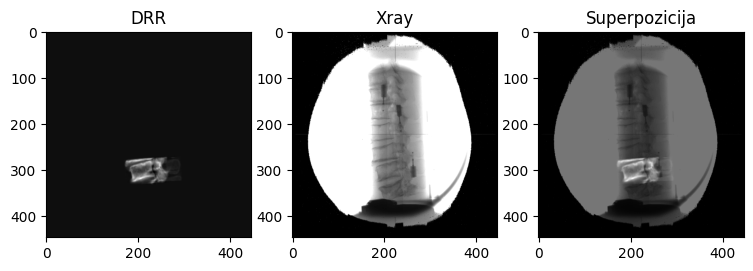

In [11]:
# Testiranje funkcije project3DTo2D
iStep = 1 # dolžina koraka vzorčenja v mm
# predobdelava 3D in 2D slik    
ct_temp = preprocess_ct(ct)
Xray_temp = preprocess_Xray(Xray)
# zaženi funkcijo in izmeri čas
ts = time.time()
oDRR, oDRRMask = project3DTo2D_slow(ct_temp, Xray_temp, iStep)    
print('Čas izračuna: {:.1f} ms'.format(1000.0*(time.time()-ts)))
# tri osi v enem prikaznem oknu
f, ax = plt.subplots(1, 3, figsize=(9,3))
ax[0].imshow(oDRR, cmap='gray')
ax[0].set_title('DRR')
ax[1].imshow(Xray_temp['img'], cmap='gray')
ax[1].set_title('Xray')      
ax[2].imshow(
    2*amslib.normalizeImage(oDRR, iType='range') + 
    amslib.normalizeImage(Xray_temp['img'], iType='range'), 
    cmap='gray')
ax[2].set_title('Superpozicija')

  Projekcija 3D slike na 2D ravnino je računsko intenzivna operacija, ki pa jo je možno enostavno paralelizirati. Izračun posamezne intenzitete v projecirani sliki namreč zahteva izračun oz. aproksimacijo integrala 3D slike vzdolž premice, ki povezuje točko v projicirani slik in pa izvor rentgenskih žarkov. Izračun posamezne intenzitete v projicirani sliki torej lahko izvedemo ločeno oz. paralelno za točke, ki tvorijo projicirano sliko. 

Paralelizacijo lahko izvedemo z uporabo **grafične procesne enote** (GPU &ndash; ang. graphical processing unit). Poleg strojne opreme za ta namen uporabljamo posebne programske knjižnice. Pri vaji bomo uporabili programsko knjižnico `CUDA`, ki je napisana v jeziku C/C++ in v kateri napišemo program za izvedbo na GPU, in Python knjižnico `pycuda`, ki omogoča klice programske kode na GPU neposredno iz Python skripte. Spodaj je dana implementacija 3D projekcije z omenjenimi knjižnicami.

Primerjajte dobljene čase projekcije 3D slike med implementacijo s `CUDA/pycuda` in z implementacijo v Pythonu.

In [10]:
# hitra različica projekcije 3D slike z implementacijo CUDA na GPU
"""
from drr import VolumeRenderer

# naloži in obdelaj surove slike
ct_temp = preprocess_ct(ct)
Xray_temp = preprocess_Xray(Xray)
# dodamo informacijo o koraku vzorčenja
ct_temp.update({'spac': [1.0, 1.0, 1.0]})
Xray_temp.update({'spac': [1.0, 1.0]})
# ustvari objekt za generiranje DRR s pycuda
vr = VolumeRenderer(
    vol=ct_temp, 
    img=Xray_temp,
    ray_step_mm=1, 
    render_op='drr'
)
# definiraj ovojniško funkcijo z enakimi vhodnimi parametri kot funkcija project3DTo2D()
def fast_project3DTo2D(ct, Xray, iStep):
    # rendering for all 2d image pixels
    drr = vr.render(ct['TPos'])
    return drr, drr != 0
# zaženi in izmeri čas izračuna
ts = time.clock()
oDRR, oDRRMask = fast_project3DTo2D(ct_temp, Xray_temp, iStep)    
print('Čas izračuna: {:.1f} ms'.format(1000.0*(time.clock()-ts)))
# ustvari tri osi v enem prikaznem oknu
f, ax = plt.subplots(1, 3, figsize=(9, 3))
ax[0].imshow(oDRR, cmap='gray')
ax[0].set_title('DRR')
ax[1].imshow(Xray_temp['img'], cmap='gray')
ax[1].set_title('Xray')      
ax[2].imshow(
    2*amslib.normalizeImage(oDRR, iType='range') + 
    amslib.normalizeImage(Xray_temp['img'], iType='range'),
    cmap='gray')
ax[2].set_title('Superpozicija')
"""

"\nfrom drr import VolumeRenderer\n\n# naloži in obdelaj surove slike\nct_temp = preprocess_ct(ct)\nXray_temp = preprocess_Xray(Xray)\n# dodamo informacijo o koraku vzorčenja\nct_temp.update({'spac': [1.0, 1.0, 1.0]})\nXray_temp.update({'spac': [1.0, 1.0]})\n# ustvari objekt za generiranje DRR s pycuda\nvr = VolumeRenderer(\n    vol=ct_temp, \n    img=Xray_temp,\n    ray_step_mm=1, \n    render_op='drr'\n)\n# definiraj ovojniško funkcijo z enakimi vhodnimi parametri kot funkcija project3DTo2D()\ndef fast_project3DTo2D(ct, Xray, iStep):\n    # rendering for all 2d image pixels\n    drr = vr.render(ct['TPos'])\n    return drr, drr != 0\n# zaženi in izmeri čas izračuna\nts = time.clock()\noDRR, oDRRMask = fast_project3DTo2D(ct_temp, Xray_temp, iStep)    \nprint('Čas izračuna: {:.1f} ms'.format(1000.0*(time.clock()-ts)))\n# ustvari tri osi v enem prikaznem oknu\nf, ax = plt.subplots(1, 3, figsize=(9, 3))\nax[0].imshow(oDRR, cmap='gray')\nax[0].set_title('DRR')\nax[1].imshow(Xray_temp['img'

5. Napišite funkcijo za 3D togo preslikavo vzorčne mreže 3D CT slike okoli njenega središča:
```python
    def rigidTransMatrix( ct, iPar ):
        return oTrans
```
kjer vhodna spremenljivka `ct` predstavlja 3D CT sliko, `iPar` pa šestvrstični vektor $\mathbf{p}=[t_x, t_y, t_z, \alpha,$ $\beta, \gamma]^{\mathrm{T}}$ s parametri 3D toge preslikave, kjer so rotacije definirane glede na center 3D slike. Izhodna spremenljivka `oTrans` naj predstavlja matriko toge preslikave 3D CT slike. 
 
 Razširite funkcijo za 2D projekcijo oz. DRR sliko tako, da bo imela dodatni vhodni parameter `iPar`, npr. `project3DTo2D( ..., iPar )`, kjer je `iPar` je šestvrstični vektor s parametri 3D toge preslikave 3D CT slike okoli njenega središča. Za 3D togo preslikavo 3D CT slike uporabite funkcijo `rigidTransMatrix( ct, iPar )`. Prikažite 2D projekcijske slike za različne vrednosti parametrov preslikave, npr. `iPar = [0 20 0 0 0 0]`, `iPar = [0 0 0 0 45 0]`, `iPar = [0 0 0 0 0 90]`.

In [15]:
def rigidTransMatrix(ct, iPar): # iPar = [tx, ty, tz, alpha, beta, gamma]
    s3z,s3y,s3x = ct['img'].shape
    oRot = amslib.transAffine3D(iTrans=(0,0,0), iRot=(iPar[3],iPar[4],iPar[5]))
    oTrans = amslib.transAffine3D(iTrans=(iPar[0],iPar[1],iPar[2]), iRot=(0,0,0))
    oCenter = amslib.transAffine3D(iTrans=(-s3x/2, -s3y/2, -s3z/2), iRot=(0,0,0))
    oInvCenter = amslib.transAffine3D(iTrans=(s3x/2, s3y/2, s3z/2), iRot=(0,0,0))
    oTrans = np.dot(oTrans, np.dot(oInvCenter, np.dot(oRot, oCenter)))
    return oTrans


def project3DTo2D(ct, Xray, iStep, iPar=[0,0,0,0,0,0]):
    TPos = np.dot(ct['TPos'], rigidTransMatrix(ct, iPar))    
    newCt = {'img':ct['img'], 'TPos':TPos}
    oDRR, oDRR_mask = project3DTo2D_slow(newCt, Xray, iStep)
    #oDRR, oDRR_mask = fast_project3DTo2D(newCt, Xray, iStep)
    return oDRR, oDRR_mask


In [16]:
# test funkcije z naslednimi parametri
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(11500)
iPar = [0, 20, 0, 0, 0, 0]
iStep = 1
# merjenje časa
ts = time.time()
oDRR, oDRRMask = project3DTo2D(ct_temp, Xray_temp, iStep, iPar)    
te = time.time()
print('Čas izračuna: {:.1f} ms'.format(1000.0*(te - ts)))
# tri osi v enem prikaznem oknu
f, ax = plt.subplots(1, 3, figsize=(9,3))
ax[0].imshow(oDRR, cmap='gray')
ax[0].set_title('DRR')
ax[1].imshow(Xray_temp['img'], cmap='gray')
ax[1].set_title('Xray')      
ax[2].imshow(
    2*amslib.normalizeImage(oDRR, iType='range') + 
    amslib.normalizeImage(Xray_temp['img'], iType='range'), 
    cmap='gray')
ax[2].set_title('Superpozicija')

3000
Čas izračuna: 142.0 ms


Text(0.5, 1.0, 'Superpozicija')

6. Napišite funkcijo, ki izračuna vrednost korelacijskega koeficienta med dvema slikama:
```python
    def correlationCoefficient( iImageI, iImageJ ):
        return oMI
```
kjer sta `iImageI` in `iImageJ` 2D sivinski sliki. Funkcija vrne skalar `oCC`, ki predstavlja vrednost korelacijskega koeficienta. Preizkusite delovanje funkcije tako, da izračunate korelacijski koeficient med projicirano sliko in 2D rentgensko sliko. 

  Napišite funkcijo, ki izračuna vrednost medsebojne informacije med dvema slikama:
```python
    def mutualInformation( iImageI, iImageJ, iBins ):
        return oMI
```
kjer sta `iImageI` in `iImageJ` 2D sivinski sliki, `iBins` pa število intervalov za izračun histograma. Funkcija vrne skalar `oMI`. Preizkusite delovanje funkcije tako, da izračunate medsebojno informacijo med projicirano sliko in 2D rentgensko sliko, pri tem pa uporabite le sivinske vrednosti na področju maske projicirane slike. Preučite vpliv števila intervalov `iBins` na vrednost medsebojne informacije.

 Izračunajte in izrišite vrednosti `oCC` in `oMI` med 2D projekcijami in 2D rentgensko sliko tako, da spreminjate le po en parameter toge preslikave naenkrat. Translacije $t_x$, $t_y$ in $t_z$ spreminjajte od -20 do 20 milimetrov s korakom 2 milimetra, rotacije $\alpha$, $\beta$ in $\gamma$ pa od -10 do 10${}^{\circ}$ s korakom 1${}^{\circ}$. 
 
 Izračunane vrednosti `oCC` in `oMI` predstavljajo vrednosti kriterijske funkcije (CF &ndash; ang. Criterion Function), ki meri podobnosti projicirane in rentgenske slik. Dane preslikave 3D CT in 2D rentgenske slike predstavljajo poravnano lego, zato pričakujete optimalne vrednosti `oCC` in `oMI` pri odmiku 0 mm oz. 0${}^{\circ}$ glede na posamezen parameter. Preverite delovanje kriterijskih funkcij tako, da narišete ter ustrezno označite grafe $CF(t_x)$, $CF(t_y)$, $CF(t_z)$, $CF(\alpha)$, $CF(\beta)$, $CF(\gamma)$ za obe meri podobnosti ($CF \in \{CC, MI\}$).

In [17]:
def correlationCoefficient(iImageI, iImageJ):
    '''
    Izracunaj korelacijski koeficient med 2D slikama
    
    Parameters
    ----------
    iImageI : numpy.ndarray
        Sivinska informacija slike I
    iImageJ : numpy.ndarray
        Sivinska informacija slike J
    
    Returns
    ---------
    oCC : float
    '''
    iImageI = np.asarray(iImageI)
    iImageJ = np.asarray(iImageJ)
    
    return np.mean(
        ((iImageI - iImageI.mean()) * (iImageJ - iImageJ.mean())) / iImageJ.std() / iImageI.std())

In [18]:
def mutualInformation(iImageI, iImageJ, iBins, iSpan=(None, None)):
    '''
    Izracunaj medsebojno informacijo med 2D slikama
    
    Parameters
    ----------
    iImageI : numpy.ndarray
        Sivinska informacija slike I
    iImageJ : numpy.ndarray
        Sivinska informacija slike J
    iBins : int
        Stevilo predalov v histogramu
    iSpan : tuple | list
        Obmocje vrednosti (min, max)
    
    Returns
    ---------
    oMI : float   
    '''
    iImageI = np.asarray(iImageI)
    iImageJ = np.asarray(iImageJ)
    
    # funkcija za pretvorbo sivinskih vrednosti v indekse
    def getIndices(iData, iBins, iSpan):
        # doloci obmocje sivinskih vrednosti  
        minVal, maxVal = iSpan
        maxVal = (np.max(iData)+1e-6 if maxVal is None else maxVal)
        minVal = (np.min(iData) if minVal is None else minVal)
        # pretvori v indeks polja
        idx = np.round((iData - minVal) / (maxVal - minVal) * (iBins-1))
        idx[idx < 0] = 0
        idx[idx >= iBins] = iBins-1
        # vrni indekse
        return idx.astype('uint32')
        
    # funkcija za izracun 1D histograma 
    def hist1D(iData, iBins, iSpan):
        # pretvorba sivinskih vrednosti v indekse
        idx = getIndices(iData, iBins, iSpan)
        # izracunaj histogram
        histData = np.zeros((iBins,))
        for i in idx:
            histData[i] += 1
        # vrni glajeni histogram
        return ni.convolve(histData, np.array([0.2, 0.6, 0.2]))
        
    # funkcija za izracun 2D histograma 
    def hist2D(iData1, iData2, iBins, iSpan):
        # pretvorba sivinskih vrednosti v indekse
        idx1 = getIndices(iData1, iBins, iSpan)
        idx2 = getIndices(iData2, iBins, iSpan)        
        # izracunaj histogram
        histData = np.zeros((iBins, iBins))    
        for (i, j) in zip(idx1, idx2):
            histData[i,j] += 1
        # vrni glajeni histogram
        return ni.convolve(histData, np.array([
                [1, 2, 1], [2, 8, 2], [1, 2, 1]])/20.0)    
        
    # izracunaj histograme slik
    hI = hist1D(iImageI, iBins, iSpan)
    hJ = hist1D(iImageJ, iBins, iSpan)
    hIJ = hist2D(iImageI, iImageJ, iBins, iSpan)

    # normaliziraj histograme v gostote verjetnosti    
    pI = hI / (np.sum(hI) + 1e-7)
    pJ = hJ / (np.sum(hJ) + 1e-7)
    pIJ = hIJ / (np.sum(hIJ) + 1e-7)
    
    # izracunaj entropije    
    HI = np.sum(- pI[pI>0] * np.log(pI[pI>0]))
    HJ = np.sum(- pJ[pJ>0] * np.log(pJ[pJ>0]))
    HIJ = np.sum(- pIJ[pIJ>0] * np.log(pIJ[pIJ>0]))
    
    # izracunaj medsebojno informacijo
    oMI = HI + HJ - HIJ
    
    return oMI

In [19]:
# Test kriterijskih funkcij z nastavljivimi parametri
iCFType = 'mi'  # izberite 'cc' ali 'mi'
iBins = 8  # preverite vpliv števila predalov na MI
par_range = np.arange(-20, 20, 0.5) # razpon translacij in rotacij ter korak

# razpon sivinskih vrednosti za histograme
iSpan = [0.0, 255.0] 
# predobdelava 3D in 2D slik    
ct_temp = preprocess_ct(ct)
Xray_temp = preprocess_Xray(Xray)
# ustvari prazno polje vrednosti
par_names = ['tx', 'ty', 'tz', 'alpha', 'beta', 'gamma']
oCF_plot = np.zeros([len(par_names), len(par_range)]).astype('float')
# normalizacija intenzitet v projekciji
oDRR, oDRRMask = project3DTo2D(ct_temp, Xray_temp, iStep)
ids = np.where(oDRRMask > 0)
xmin, xmax = np.min(ids[1]), np.max(ids[1])
ymin, ymax = np.min(ids[0]), np.max(ids[0])

verbose = False
for par in range(len(par_names)):
    for idx in range(len(par_range)):
        iPar = np.zeros([len(par_names),1])
        iPar[par] = par_range[idx]
        
                    
        oDRR, oDRRMask = project3DTo2D(ct_temp, Xray_temp, iStep, np.squeeze(iPar))

        if iCFType == 'mi':
            # poklici funkcijo
            ids = np.where(oDRRMask > 0)
            xmin, xmax = np.min(ids[1]), np.max(ids[1])
            ymin, ymax = np.min(ids[0]), np.max(ids[0])
            # izreži masko
            iImageI = Xray_temp['img'][ymin:ymax, xmin:xmax]
            iImageJ = oDRR[ymin:ymax, xmin:xmax]
            # normaliziraj intenzitete
            iImageI = (iImageI - iImageI.min()) / (iImageI.max() - iImageI.min()) * 255.0
            iImageJ = (iImageJ - iImageJ.min()) / (iImageJ.max() - iImageJ.min()) * 255.0
            # izračunaj MI
            oCF = mutualInformation(iImageI, iImageJ, iBins, iSpan)                    
        elif iCFType == 'cc':
            iImageI = Xray_temp['img']       
            iImageJ = oDRR          
            # izračunaj CC
            oCF = correlationCoefficient(iImageI, iImageJ)
        
        oCF_plot[par, idx] = oCF

        if verbose:
            print('p: {:.1f}, CF={:.2f}'.format(p, oMI)) 

fig, axs = plt.subplots(2, 3, figsize=(9, 7))
axs[0,0].plot(par_range, oCF_plot[0, :])
axs[0,0].plot([0, 0], [oCF_plot[0,:].min(), oCF_plot[0,:].max()], 'r--')
axs[0,0].set_title('Parameter "{}"'.format(par_names[0]))

axs[0,1].plot(par_range, oCF_plot[1, :])
axs[0,1].plot([0, 0], [oCF_plot[1,:].min(), oCF_plot[1,:].max()], 'r--')
axs[0,1].set_title('Parameter "{}"'.format(par_names[1]))

axs[0,2].plot(par_range, oCF_plot[2, :])
axs[0,2].plot([0, 0], [oCF_plot[2,:].min(), oCF_plot[2,:].max()], 'r--')
axs[0,2].set_title('Parameter "{}"'.format(par_names[2]))

axs[1,0].plot(par_range, oCF_plot[3, :])
axs[1,0].plot([0, 0], [oCF_plot[3,:].min(), oCF_plot[3,:].max()], 'r--')
axs[1,0].set_title('Parameter "{}"'.format(par_names[3]))

axs[1,1].plot(par_range, oCF_plot[4, :])
axs[1,1].plot([0, 0], [oCF_plot[4,:].min(), oCF_plot[4,:].max()], 'r--')
axs[1,1].set_title('Parameter "{}"'.format(par_names[4]))

axs[1,2].plot(par_range, oCF_plot[5, :])
axs[1,2].plot([0, 0], [oCF_plot[5,:].min(), oCF_plot[5,:].max()], 'r--')
axs[1,2].set_title('Parameter "{}"'.format(par_names[5]))                  

Text(0.5, 1.0, 'Parameter "gamma"')

7. Načrtajte avtomatski postopek za poravnavo 3D in 2D slik tako, da ustvarite kriterijsko funkcijo:
```python
    def criterionFcn( iPar, ct, Xray ):
        return oCF
```
ki pri podanih parametrih 3D toge preslikave `iPar` izračuna vrednost izbrane mere podobnosti med DRR in 2D rentgensko sliko. Optimalne vrednosti parametrov $\mathbf{p}^*$ toge preslikave določite s pomočjo simpleksne optimizacije (Nelder-Mean) ali Powellove optimizacije.

In [23]:
def criterionFcn(iPar, ct, Xray):
    ### BEGIN SOLUTION 
    cf_type = 'cc' # opcijsko parameter funkcije
    iStep = 1
    iBins = 8
    iSpan = [0.0, 255.0]

    oDRR, oDRRMask = project3DTo2D(ct, Xray, iStep, iPar)

    if cf_type == 'mi':
        ids = np.where(oDRRMask>0)
        xmin, xmax = np.min(ids[1]), np.max(ids[1])
        ymin, ymax = np.min(ids[0]), np.max(ids[0])
        iImageI = Xray['img'][ymin:ymax,xmin:xmax]
        iTemp = oDRR[ymin:ymax, xmin:xmax]
        imin, imax = np.min(iTemp), np.max(iTemp)
        iImageJ = (iTemp - imin) / (imax - imin) * 255.0
        oCF = - mutualInformation(iImageI, iImageJ, iBins, iSpan)
    elif cf_type == 'cc':
        iImageI = Xray['img']
        iImageJ = oDRR        
        oCF = correlationCoefficient(iImageI, iImageJ)
    ### END SOLUTION 
    return oCF

In [24]:
# test funkcije
opt_type = 'Nelder-Mead'  # izberite 'Powell' ali 'Nelder-Mead'
disp_iter = True

# OPCIJA 1: optimizacija enega parametra toge preslikave: alpha
def get_full_par(iPar):
    return [0, 0, 0, iPar, 0, 0]
iParStart = get_full_par(-1)


# OPCIJA 2: optimizacija vseh 6 parametrov toge preslikave: tx, ty, tz, alpha, beta, gamma
iParStart = [-5, 0, 5, -5, 5, 0]

def get_full_par(iPar):
    return [iPar[0], iPar[1], iPar[2], iPar[3], iPar[4], iPar[5]]

# predobdelava 3D in 2D slik    
ct_temp = preprocess_ct(ct)
Xray_temp = preprocess_Xray(Xray)    

# definicija ovojniške funkcije CF(p)
oCF = lambda iPar : criterionFcn(get_full_par(iPar), ct_temp, Xray_temp)

neval = 1
def callbackF(iPar):
    global neval
    fval = oCF(iPar)
    print('{0:4d}   {1: 3.6f}'.format(neval, fval))
    neval += 1        
if disp_iter:
    print('{0:4s}   {1:9s}'.format('Iter', ' CF(p)'))

# klic optimizacije
ts = time.time()
# method = Nelder-Mead (simpleksna optimizacija), Powell
res = minimize(fun=oCF, x0=iParStart, method=opt_type, tol=1e-6, 
                options={'maxiter':50, 'maxfev':5000, 'xtol':1e-6, 
                'ftol':1e-6, 'disp': disp_iter}, callback=(callbackF if disp_iter else None))
iParEnd = res.x
print('Čas izračuna: {:.1f} s'.format(time.time()-ts))    
print('iPar pred poravnavo: {}\niPar po poravnavi: {}'.format(
      iParStart, iParEnd))

iParStart = get_full_par(iParStart)
iParEnd = get_full_par(iParEnd)

# prikaz rezultatov
oDRR_start, oDRRMask = project3DTo2D(ct_temp, Xray_temp, 3, iParStart)
oDRR_end, oDRRMask = project3DTo2D(ct_temp, Xray_temp, 3, iParEnd)
oDRR_optim, oDRRMask = project3DTo2D(ct_temp, Xray_temp, 3, np.squeeze(np.zeros((6,1))))

# Prikaz
f1, ax1 = plt.subplots(1, 3, figsize=(9, 3))
ax1[0].imshow(oDRR_start, cmap='gray')
ax1[0].set_title('DRR pred poravnavo')

ax1[1].imshow(oDRR_end, cmap='gray')
ax1[1].set_title('DRR po poravnavi')

ax1[2].imshow(np.abs(oDRR_end-oDRR_optim), cmap='gray')
ax1[2].set_title('Razlika DRR ocena in optimum')

f2, ax2 = plt.subplots(1, 3, figsize=(9, 3))
ax2[0].imshow(2*amslib.normalizeImage(oDRR_start, iType='range') + 
  amslib.normalizeImage(Xray_temp['img'], iType='range'), cmap='gray')
ax2[0].set_title('Superpozicija pred poravnavo')

ax2[1].imshow(2*amslib.normalizeImage(oDRR_end, iType='range') + 
  amslib.normalizeImage(Xray_temp['img'], iType='range'), cmap='gray')
ax2[1].set_title('Superpozicija po poravnavi')

ax2[2].imshow(2*amslib.normalizeImage(oDRR_optim, iType='range') + 
  amslib.normalizeImage(Xray_temp['img'], iType='range'), cmap='gray')
ax2[2].set_title('Superpozicija v optimalni pozi')


Iter    CF(p)   


/var/folders/ds/rh95w3ms49jdtt84jdfn69vm0000gn/T/ipykernel_6595/3811062188.py:36: OptimizeWarning: Unknown solver options: xtol, ftol
  res = minimize(fun=oCF, x0=iParStart, method=opt_type, tol=1e-6,


   1   -0.007158
   2   -0.007158
   3   -0.007158
   4   -0.007158
   5   -0.007449
   6   -0.007449
   7   -0.007878
   8   -0.007878
   9   -0.008311
  10   -0.008311
  11   -0.008673
  12   -0.008673
  13   -0.008722
  14   -0.008722
  15   -0.008722
  16   -0.008722
  17   -0.008722
  18   -0.008722
  19   -0.008722
  20   -0.008722
  21   -0.008722
  22   -0.008722
  23   -0.008722
  24   -0.008722
  25   -0.008722
  26   -0.008722
  27   -0.008722
  28   -0.008722
  29   -0.008722
  30   -0.008722
  31   -0.008730
  32   -0.008740
  33   -0.008740
  34   -0.008766
  35   -0.008766
  36   -0.008766
  37   -0.008787
  38   -0.008787
  39   -0.008787
  40   -0.008787
  41   -0.008817
  42   -0.008817
  43   -0.008852
  44   -0.008852
  45   -0.008852
  46   -0.008940
  47   -0.008940
  48   -0.008940
  49   -0.009020
Čas izračuna: 18.4 s
iPar pred poravnavo: [-5, 0, 5, -5, 5, 0]
iPar po poravnavi: [-8.11885575e+00  2.24007605e-03  1.04869188e+00 -4.97700587e+00
  4.36496593e+00 -4.

/var/folders/ds/rh95w3ms49jdtt84jdfn69vm0000gn/T/ipykernel_6595/3811062188.py:36: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(fun=oCF, x0=iParStart, method=opt_type, tol=1e-6,


Text(0.5, 1.0, 'Superpozicija v optimalni pozi')